In [1]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt


customer = pd.read_csv('C:/Users/tkryu/Desktop/빅데이터 공부/Code States/Section 6/Project 2/Brazilian E-Commerce/data//olist_customers_dataset.csv', dtype={'customer_zip_code_prefix': str})
geo = pd.read_csv("C:/Users/tkryu/Desktop/빅데이터 공부/Code States/Section 6/Project 2/Brazilian E-Commerce/data/olist_geolocation_dataset.csv", dtype={'geolocation_zip_code_prefix': str})

order_items = pd.read_csv('C:/Users/tkryu/Desktop/빅데이터 공부/Code States/Section 6/Project 2/Brazilian E-Commerce/data//olist_order_items_dataset.csv')
order_reviews = pd.read_csv('C:/Users/tkryu/Desktop/빅데이터 공부/Code States/Section 6/Project 2/Brazilian E-Commerce/data//olist_order_reviews_dataset.csv')
order_payment = pd.read_csv('C:/Users/tkryu/Desktop/빅데이터 공부/Code States/Section 6/Project 2/Brazilian E-Commerce/data//olist_order_payments_dataset.csv', dtype={'customer_zip_code_prefix': str})
orders_df = pd.read_csv('C:/Users/tkryu/Desktop/빅데이터 공부/Code States/Section 6/Project 2/Brazilian E-Commerce/data//olist_orders_dataset.csv')

product = pd.read_csv('C:/Users/tkryu/Desktop/빅데이터 공부/Code States/Section 6/Project 2/Brazilian E-Commerce/data//olist_products_dataset.csv', dtype={'customer_zip_code_prefix': str})
seller = pd.read_csv('C:/Users/tkryu/Desktop/빅데이터 공부/Code States/Section 6/Project 2/Brazilian E-Commerce/data//olist_sellers_dataset.csv', dtype={'customer_zip_code_prefix': str})
category = pd.read_csv('C:/Users/tkryu/Desktop/빅데이터 공부/Code States/Section 6/Project 2/Brazilian E-Commerce/data//product_category_name_translation.csv', dtype={'customer_zip_code_prefix': str})


In [2]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
2,01046,-23.546129,-46.642951,sao paulo,SP
3,01041,-23.544392,-46.639499,sao paulo,SP
4,01035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### 주문 관련 df 통합

In [11]:
orders = orders_df.merge(order_items, on='order_id')
orders = orders.merge(customer, on='customer_id')
orders = orders.merge(order_reviews, on='order_id')
orders = orders.merge(order_payment, on='order_id')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.12


### product 데이터 category 영어로 변경

In [12]:
# 카테고리 갯수 확인
print(len(product['product_category_name'].unique()))
print(len(category['product_category_name'].unique()))

74
71


In [13]:
# 영문명이 없는 카테고리 확인
category_no_eng = []
for x in product['product_category_name'].unique():
    if x in category['product_category_name'].unique():
        pass
    else : category_no_eng.append(x)
print(category_no_eng)

[nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos']


In [14]:
# pc_gamer 항목의 갯수 확인
product[product['product_category_name'] == 'pc_gamer']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0
16930,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0


In [15]:
# portateis_cozinha_e_preparadores_de_alimentos 항목 갯수 확인
product[product['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0
11039,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0
14266,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0
16182,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0
17800,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0
18610,7afdd65f79f63819ff5bee328843fa37,portateis_cozinha_e_preparadores_de_alimentos,48.0,305.0,1.0,750.0,20.0,20.0,20.0
26890,a4756663d007b0cd1af865754d08d968,portateis_cozinha_e_preparadores_de_alimentos,60.0,1304.0,4.0,650.0,22.0,6.0,14.0
29919,cb9d764f38ee4d0c00af64d5c388f837,portateis_cozinha_e_preparadores_de_alimentos,57.0,306.0,1.0,625.0,28.0,27.0,24.0


In [16]:
# 결측값 갯수 확인
print(len(product[product['product_category_name'].isnull()]))
product[product['product_category_name'].isnull()]

610


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [17]:
len(product)

32951

In [18]:
product_null = product[product['product_category_name'].isnull()]

print(len(orders))

orders[orders['product_id'].isin(product_null['product_id'])]

117329


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,1,a1804276d9941ac0733cfd409f5206eb,...,e07549ef5311abcc92ba1784b093fb56,2,NaN,fiquei triste por n ter me atendido.,2017-05-13 00:00:00,2017-05-13 20:25:42,1,credit_card,1,65.95
128,bfe42c22ecbf90bc9f35cf591270b6a7,803ac05904124294f8767894d6da532b,delivered,2018-01-27 22:04:34,2018-01-27 22:16:18,2018-02-03 03:56:00,2018-02-09 20:16:40,2018-02-26 00:00:00,1,71225f49be70df4297892f6a5fa62171,...,53cf7b4afe46cf70cde7948d8001d19e,5,NaN,NaN,2018-02-10 00:00:00,2018-02-12 13:26:21,1,credit_card,1,42.40
219,58ac1947c1a9067b9f416cba6d844a3f,ee8e1d37f563ecc11cc4dcb4dfd794c2,delivered,2017-09-13 09:18:50,2017-09-13 13:45:43,2017-09-14 21:20:03,2017-09-21 21:16:17,2017-09-25 00:00:00,1,9820e04e332fc450d6fd975befc1bc28,...,d734648af60219fadf470e2d8535163e,5,NaN,NaN,2017-09-22 00:00:00,2017-09-23 10:28:15,1,credit_card,5,124.16
272,e22b71f6e4a481445ec4527cb4c405f7,1faf89c8f142db3fca6cf314c51a37b6,delivered,2017-04-22 13:48:18,2017-04-22 14:01:13,2017-04-24 19:08:53,2017-05-02 15:45:27,2017-05-11 00:00:00,1,3bc5164bc7f4be77002d6651da65c98c,...,86e4141a3c56080e60189d18a7e3cb0e,4,NaN,NaN,2017-05-03 00:00:00,2017-05-04 09:36:56,1,credit_card,3,34.24
314,a094215e786240fcfefb83d18036a1cd,86acfb656743da0c113d176832c9d535,delivered,2018-02-08 18:56:45,2018-02-08 19:32:18,2018-02-09 21:41:54,2018-02-19 13:28:50,2018-02-22 00:00:00,1,5a848e4ab52fd5445cdc07aab1c40e48,...,047d4c1b93ae62b7b9d5dd6f24d12b2f,5,NaN,NaN,2018-02-24 00:00:00,2018-02-24 15:34:02,1,credit_card,1,132.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116874,020f8f4df303ae8aa39b806b766d2681,d588273738545bc6a0d30971bf72e938,delivered,2017-12-27 09:58:49,2017-12-27 10:10:33,2018-01-04 22:27:07,2018-01-09 21:58:57,2018-01-23 00:00:00,1,b1d207586fca400a2370d50a9ba1da98,...,19e0a180def53ca626195f58c8043718,5,NaN,NaN,2018-01-10 00:00:00,2018-01-11 10:08:39,1,credit_card,3,163.79
116890,1a10e938a1c7d8e5eecc3380f71ca76b,8a81607347c25d881d995d94de6ad824,delivered,2018-07-25 08:58:35,2018-07-26 03:10:20,2018-07-27 11:32:00,2018-08-01 19:28:20,2018-08-10 00:00:00,1,8d39a63db6a98e40571f486e0c711cf7,...,40d4f7d654d093f4c2ce307d6f90134e,5,NaN,NaN,2018-08-02 00:00:00,2018-08-05 02:15:09,1,boleto,1,146.19
117067,e33865519137f5737444109ae8438633,64b086bdcc54458af3ea3bd838db54a5,delivered,2018-05-28 00:44:06,2018-05-29 03:31:17,2018-05-30 13:13:00,2018-06-01 22:25:39,2018-06-20 00:00:00,1,e9cbc0910ab050cbd92fbeb051c270ea,...,f7f1b36bc84a0aa1810a301ed8abbb17,5,NaN,NaN,2018-06-02 00:00:00,2018-06-03 02:16:03,1,boleto,1,42.14
117074,f0dd9af88d8ef5a8e4670fbbedaf19c4,30ddb50bd22ee927ebe308ea3da60735,delivered,2017-09-02 20:38:29,2017-09-05 04:24:12,2017-09-14 23:13:41,2017-09-15 14:59:50,2017-09-19 00:00:00,1,0c877471e35049402bca235e06cb8063,...,1c7e1a24358cea9db1eecc6987843a28,5,NaN,NaN,2017-09-16 00:00:00,2017-09-17 18:00:10,1,boleto,1,100.25


In [19]:
# category 데이터프레임을 dictionary로 1
 
category_dict = category.set_index('product_category_name').T.to_dict('index')
category_dict

{'product_category_name_english': {'beleza_saude': 'health_beauty',
  'informatica_acessorios': 'computers_accessories',
  'automotivo': 'auto',
  'cama_mesa_banho': 'bed_bath_table',
  'moveis_decoracao': 'furniture_decor',
  'esporte_lazer': 'sports_leisure',
  'perfumaria': 'perfumery',
  'utilidades_domesticas': 'housewares',
  'telefonia': 'telephony',
  'relogios_presentes': 'watches_gifts',
  'alimentos_bebidas': 'food_drink',
  'bebes': 'baby',
  'papelaria': 'stationery',
  'tablets_impressao_imagem': 'tablets_printing_image',
  'brinquedos': 'toys',
  'telefonia_fixa': 'fixed_telephony',
  'ferramentas_jardim': 'garden_tools',
  'fashion_bolsas_e_acessorios': 'fashion_bags_accessories',
  'eletroportateis': 'small_appliances',
  'consoles_games': 'consoles_games',
  'audio': 'audio',
  'fashion_calcados': 'fashion_shoes',
  'cool_stuff': 'cool_stuff',
  'malas_acessorios': 'luggage_accessories',
  'climatizacao': 'air_conditioning',
  'construcao_ferramentas_construcao': 'con

In [20]:
# category 데이터프레임을 dictionary로 2

category_dict = category_dict.get('product_category_name_english')
category_dict

{'beleza_saude': 'health_beauty',
 'informatica_acessorios': 'computers_accessories',
 'automotivo': 'auto',
 'cama_mesa_banho': 'bed_bath_table',
 'moveis_decoracao': 'furniture_decor',
 'esporte_lazer': 'sports_leisure',
 'perfumaria': 'perfumery',
 'utilidades_domesticas': 'housewares',
 'telefonia': 'telephony',
 'relogios_presentes': 'watches_gifts',
 'alimentos_bebidas': 'food_drink',
 'bebes': 'baby',
 'papelaria': 'stationery',
 'tablets_impressao_imagem': 'tablets_printing_image',
 'brinquedos': 'toys',
 'telefonia_fixa': 'fixed_telephony',
 'ferramentas_jardim': 'garden_tools',
 'fashion_bolsas_e_acessorios': 'fashion_bags_accessories',
 'eletroportateis': 'small_appliances',
 'consoles_games': 'consoles_games',
 'audio': 'audio',
 'fashion_calcados': 'fashion_shoes',
 'cool_stuff': 'cool_stuff',
 'malas_acessorios': 'luggage_accessories',
 'climatizacao': 'air_conditioning',
 'construcao_ferramentas_construcao': 'construction_tools_construction',
 'moveis_cozinha_area_de_ser

In [21]:
# map으로 dictonary 적용
product_trans = product.copy()
product_trans['product_category_name'] = product.product_category_name.map(category_dict)
product_trans.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### 결측값 확인

In [22]:
orders.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             103437
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0


In [23]:
# order_approved_at 주문일 항목의 결측치 확인
# 다른 항목들도 결측치가 있지 않을까 했는데, 데이터를 보니 다른 항목들은 멀쩡해보인다.
orders[orders['order_approved_at'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
6214,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00,1,0e20a07ca1714df21f9b07ca3bf7c682,...,5d0fd5deb7e6a4f952cf63cc52cc18e3,4,NaN,"Muita demora, mas, tudo ok.\r\nTerezinha",2017-03-21 00:00:00,2017-03-21 17:35:02,1,boleto,1,349.01
19516,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00,1,2c2b6a28924791234bd386bddb17512e,...,a2f476daadcb4b1f28542a6eabf99612,5,NaN,NaN,2017-03-03 00:00:00,2017-03-04 23:25:49,1,boleto,1,396.86
22425,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00,1,583916a5dae918f5e89baec139141c54,...,4fd6d43fb8b2bad8cc665aa96b82accc,5,NaN,NaN,2017-03-02 00:00:00,2017-03-03 07:21:03,1,boleto,1,65.52
26727,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00,1,c6dd917a0be2a704582055949915ab32,...,4930703ae4fccd4d2d3b44cf63a9e632,5,NaN,NaN,2017-03-10 00:00:00,2017-03-13 00:18:46,1,boleto,1,106.81
27319,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00,1,c6dd917a0be2a704582055949915ab32,...,4e44dd381f3c4f7afddacf8b9aa0c47a,5,NaN,NaN,2017-03-03 00:00:00,2017-03-04 00:06:38,1,boleto,1,95.76
31669,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00,1,5ab02ca028398131a5ae91401eb49788,...,a8353da830468c234d99152e0b714fed,4,NaN,Bom custo x benefício pra proteger o crânio da...,2017-02-01 00:00:00,2017-02-03 11:18:15,1,boleto,1,54.51
45231,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00,1,cae2e38942c8489d9d7a87a3f525c06b,...,6540ad5bc5a8bfc9ede2d495bfb940dd,5,NaN,Excelente produto,2017-03-03 00:00:00,2017-03-04 21:06:06,1,boleto,1,163.43
46458,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00,1,02a79d79e818ad0be36cfc843a6af7ad,...,ce1c8f5c23a5b96c8d27878e666ad3f2,5,NaN,"o produto chegou antes do prazo, é muito bom",2017-03-04 00:00:00,2017-06-20 23:17:56,1,boleto,1,39.95
57104,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00,1,c3b271f47e73d0c9ccf1b43b7606c705,...,24f83e3e2c75b58888eec93ab93f2cca,2,NaN,Não gostei. O material não é tão bom. A cor do...,2017-02-07 00:00:00,2017-02-10 10:20:44,1,boleto,1,60.42
72672,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00,1,4fd676d9c4723d475026e40aeae56957,...,dbe2aa3672139d1bfad4355863939c30,5,NaN,NaN,2017-03-04 00:00:00,2017-03-05 11:59:21,1,boleto,1,154.23


In [24]:
orders[orders['order_delivered_carrier_date'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,1,a1804276d9941ac0733cfd409f5206eb,...,e07549ef5311abcc92ba1784b093fb56,2,NaN,fiquei triste por n ter me atendido.,2017-05-13 00:00:00,2017-05-13 20:25:42,1,credit_card,1,65.95
124,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00,1,1522589c64efd46731d3522568e5bc83,...,c4b17a374b71539eb360fe5baaa9a10e,3,bolo fake,"Gostei do produto, porem fiquei preocupada não...",2018-08-25 00:00:00,2018-08-29 10:48:52,1,boleto,1,50.35
154,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00,1,61d52f4882421048afd530db53d6f230,...,8079a046b23b88c4cea485cfbd8aec39,5,NaN,NaN,2017-10-05 00:00:00,2017-10-05 12:55:11,1,credit_card,2,138.28
381,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00,1,ca17b18b38db6e0d2c33d362322f2a06,...,160850927a5f16f903dc83a05e0a5826,1,NaN,NaN,2016-12-11 00:00:00,2016-12-13 10:17:32,1,credit_card,1,299.84
464,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00,1,ad673c1cd02b966e931f9db4fdc34791,...,14d540de5632307e389e9416086fc978,1,NaN,NaN,2018-08-17 00:00:00,2018-08-19 13:51:01,1,boleto,1,33.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116886,46bdec7cc92d926500bee756ee1df6dc,0cfcefc0ed0af6a2e601540feeac24e7,invoiced,2018-07-16 13:20:06,2018-07-16 13:30:35,NaN,NaN,2018-08-06 00:00:00,1,b57109d3dd3821f2685c6035112fc9a9,...,ed8017eaaea74d271affe463beb1256d,1,Péssimo,Péssimo atendimento péssima entrega. Sequer ti...,2018-08-08 00:00:00,2018-08-09 02:01:53,1,credit_card,3,112.46
116974,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaN,NaN,2018-01-26 00:00:00,1,aa428a8e4d587520f90d37a08030a812,...,f6759f43e623fa4ef8c0a698458c0689,1,NaN,NaN,2018-01-28 00:00:00,2018-01-28 21:10:38,1,credit_card,2,113.34
116983,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaN,NaN,2017-10-27 00:00:00,1,dc2410804cf782c5d87dbcd201b74e9b,...,da12d47f5616024c216d6a5ad19ec5ac,1,NaN,Após o produto faturado a loja enviou e-mail q...,2017-10-29 00:00:00,2017-10-29 12:49:13,1,credit_card,3,333.62
116984,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaN,NaN,2017-10-27 00:00:00,2,dc2410804cf782c5d87dbcd201b74e9b,...,da12d47f5616024c216d6a5ad19ec5ac,1,NaN,Após o produto faturado a loja enviou e-mail q...,2017-10-29 00:00:00,2017-10-29 12:49:13,1,credit_card,3,333.62


In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

Datetime

In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [27]:
from datetime import datetime

orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at)
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['actual_delivery_time'] = orders.order_delivered_customer_date - orders.order_delivered_carrier_date
orders['actual_delivery_time'] = orders['actual_delivery_time'].dt.days
orders['review_creation_date'] = pd.to_datetime(orders['review_creation_date'])
orders['review_answer_timestamp'] = pd.to_datetime(orders['review_answer_timestamp'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   117329 non-null  object        
 3   order_purchase_timestamp       117329 non-null  datetime64[ns]
 4   order_approved_at              117314 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116094 non-null  datetime64[ns]
 6   order_delivered_customer_date  114858 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   order_item_id                  117329 non-null  int64         
 9   product_id                     117329 non-null  object        
 10  seller_id                      117329 non-null  object        
 11  

In [28]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,actual_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1,credit_card,1,18.12,6.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3,voucher,1,2.00,6.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,2,voucher,1,18.59,6.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,1,boleto,1,141.46,12.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58,1,credit_card,3,179.12,9.0


In [29]:
orders_date = orders.copy()

# 시간 빼고 표기
# orders_date['order_approved_at'] = pd.to_datetime(orders_date.order_approved_at, format='%Y-%m-%d').dt.date
# orders_date['order_delivered_customer_date'] = pd.to_datetime(orders_date.order_delivered_customer_date).dt.date
# orders_date['order_estimated_delivery_date'] = pd.to_datetime(orders_date.order_estimated_delivery_date).dt.date
# orders_date['order_delivered_carrier_date'] = pd.to_datetime(orders_date.order_delivered_carrier_date).dt.date
# orders_date['actual_delivery_time'] = orders_date.order_delivered_customer_date - orders_date.order_delivered_carrier_date

# 구매 연 / 월 / 요일 별로 칼럼 나누기
orders['order_purchase_year'] = orders['order_purchase_timestamp'].dt.year
orders['order_purchase_month'] = orders['order_purchase_timestamp'].dt.month
orders['order_purchase_day'] = orders['order_purchase_timestamp'].dt.day_name()
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,actual_delivery_time,order_purchase_year,order_purchase_month,order_purchase_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017-10-11,2017-10-12 03:43:48,1,credit_card,1,18.12,6.0,2017,10,Monday
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017-10-11,2017-10-12 03:43:48,3,voucher,1,2.00,6.0,2017,10,Monday
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017-10-11,2017-10-12 03:43:48,2,voucher,1,18.59,6.0,2017,10,Monday
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,2018-08-08,2018-08-08 18:37:50,1,boleto,1,141.46,12.0,2018,7,Tuesday
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,2018-08-18,2018-08-22 19:07:58,1,credit_card,3,179.12,9.0,2018,8,Wednesday


<AxesSubplot:xlabel='order_purchase_year', ylabel='count'>

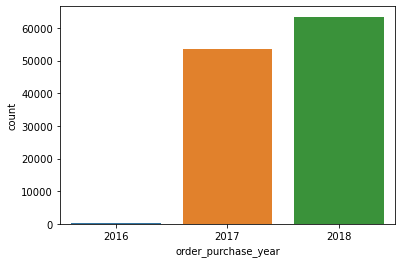

In [30]:
sns.countplot(data = orders, x = orders['order_purchase_year'])

<AxesSubplot:xlabel='order_purchase_year', ylabel='price'>

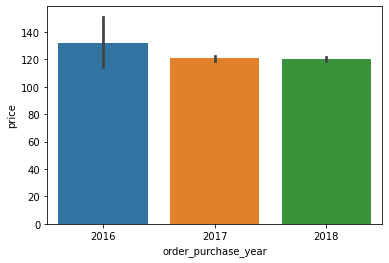

In [31]:
sns.barplot(data = orders, x = 'order_purchase_year', y = orders['price'])

In [32]:
# 연도별 매출 비교를 위한 df 생성
sales = orders.groupby(['order_purchase_year', 'order_purchase_month'], as_index=False).sum().loc[:,['order_purchase_year', 'order_purchase_month', 'price']]
sales.rename(columns = {'price' : 'sales'}, inplace = True)
sales_2016 = sales[sales['order_purchase_year'] == 2016]
sales_2017 = sales[sales['order_purchase_year'] == 2017]
sales_2018 = sales[sales['order_purchase_year'] == 2018]

months = np.arange(1, 13)
df_append = pd.DataFrame({})
grouped_dfs = sales_2016, sales_2017, sales_2018
years = [2016, 2017, 2018]
idx = 0

for df in grouped_dfs:
    for month in months:
        # If there is a nonexistent month
        if month not in df['order_purchase_month'].values:
            dict_append = {
                'order_purchase_year': years[idx],
                'order_purchase_month': month,
                'sales': 0
            }
            df_append = df_append.append(dict_append, ignore_index=True)
    # Insert the dictionary on dataset and sort it by month
    df = df.append(df_append)
    df = df.fillna(0)
    df = df.astype(int)
    df.sort_values(by='order_purchase_month', inplace=True)
    df_append = pd.DataFrame({})
    # Index the result on each dataset
    if idx == 0:
        sales_2016 = df
    elif idx == 1:
        sales_2017 = df
    else:
        sales_2018 = df
    idx += 1


In [33]:
sales_2016

,order_purchase_year,order_purchase_month,sales
0,2016,1,0
1,2016,2,0
2,2016,3,0
3,2016,4,0
4,2016,5,0
5,2016,6,0
6,2016,7,0
7,2016,8,0
0,2016,9,132
1,2016,10,50272


fig, axs = plt.subplots(3, 1, figsize = (10,10))
sns.b

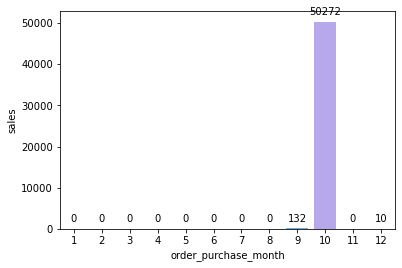

In [34]:
ax = sns.barplot(data = sales_2016, x='order_purchase_month', y='sales')
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 

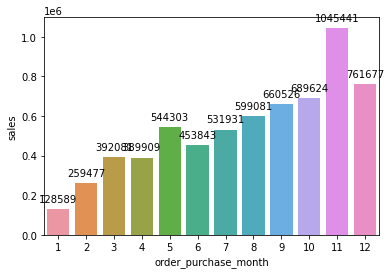

In [35]:
ax = sns.barplot(data = sales_2017, x='order_purchase_month', y='sales')
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 

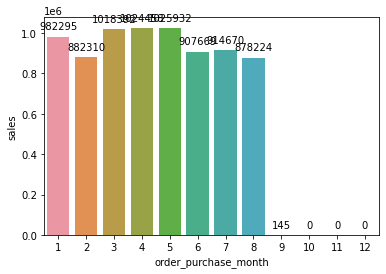

In [36]:
ax = sns.barplot(data = sales_2018, x='order_purchase_month', y='sales')
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 

In [37]:
def bar_plot(x, y, df, ax, colors='Blues_d', hue=False, value=False):
    """
    This function plots, and customize a bar chart

    Input:
        x: feature to be plotted on x axis
        y: feature to be plotted on y axis
        df: DataFrame object with features used on x and y
        colors: standard palette is "Blues_d"
        hue: separation value, standard is False
        value: flag for defining if the data labels on bars will be the value (True) or percentual (False)
        
    Returns:
        None
    """
    # Counting numerical feature (x or y)
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    
    # Plotting
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Customizing data labels (values of percents)
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom')
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom')
            
def format_spines(ax, right_border=True):
    """
    This function is responsible for format axis from graphs
    
    Input:
        ax: matplotlib axis
        right_border: boolean flag for plot the right border of graphs
    
    Output:
        None
    """    
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

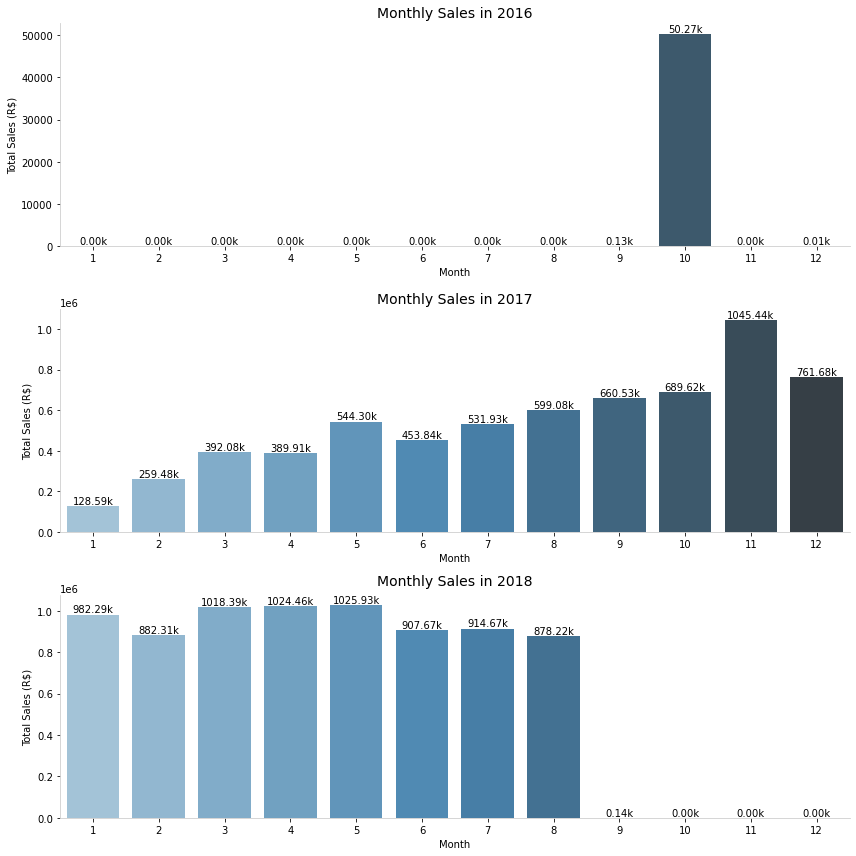

In [38]:
months = np.arange(1,13)

# Total sales by month
fig, axs = plt.subplots(3, 1, figsize=(12, 12))
bar_plot(x='order_purchase_month', y='sales', df=sales_2016, ax=axs[0], value=True)
bar_plot(x='order_purchase_month', y='sales', df=sales_2017, ax=axs[1], value=True)
bar_plot(x='order_purchase_month', y='sales', df=sales_2018, ax=axs[2], value=True)

# plt.setp(axs, xticks = months, xticklabels = months)
# # plt.xticks(months, months)
# ax0 = sns.barplot(x='order_purchase_month', y='sales', data=sales_2016, ax=axs[0])
# for p in ax0.patches: 
#     ax0.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
#        ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
#        textcoords='offset points') 
    
# ax1 = sns.barplot(x='order_purchase_month', y='sales', data=sales_2017, ax=axs[1])
# for p in ax1.patches: 
#     ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
#        ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
#        textcoords='offset points') 
    
# ax2 = sns.barplot(x='order_purchase_month', y='sales', data=sales_2018, ax=axs[2])
# for p in ax2.patches: 
#     ax2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
#        ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
#        textcoords='offset points') 
    
# Customizing
axs_list = axs[0], axs[1], axs[2]
for ax in axs_list:
    format_spines(ax, right_border=False)
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Sales (R$)')
#     ax.set_ytick
axs[0].set_title('Monthly Sales in 2016', size=14)
axs[1].set_title('Monthly Sales in 2017', size=14)
axs[2].set_title('Monthly Sales in 2018', size=14, pad=10)
plt.tight_layout()
plt.show()

In [39]:
sales.head()

,order_purchase_year,order_purchase_month,sales
0,2016,9,132.39
1,2016,10,50272.47
2,2016,12,10.90
3,2017,1,128589.06
4,2017,2,259477.98


In [40]:
sales['year_month'] = sales['order_purchase_year'].astype(str) + '-' + sales['order_purchase_month'].astype(str)
sales['year_month'] = pd.to_datetime(sales['year_month'], format='%Y-%m').dt.to_period('M')
sales['year_month'] = sales['year_month'].astype(str)
sales.head()

,order_purchase_year,order_purchase_month,sales,year_month
0,2016,9,132.39,2016-09
1,2016,10,50272.47,2016-10
2,2016,12,10.90,2016-12
3,2017,1,128589.06,2017-01
4,2017,2,259477.98,2017-02


In [41]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_purchase_year   24 non-null     int64  
 1   order_purchase_month  24 non-null     int64  
 2   sales                 24 non-null     float64
 3   year_month            24 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 960.0+ bytes


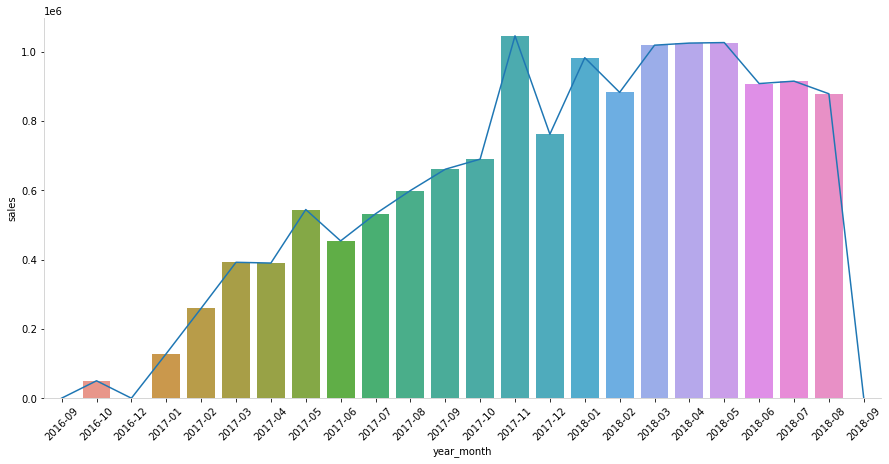

In [42]:
# plt.figsize = (20,10)
plt.figure(figsize=(15,7))
ax = sns.lineplot(data = sales, x = 'year_month', y = 'sales')
ax = sns.barplot(data = sales, x = 'year_month', y = 'sales')
format_spines(ax, right_border=False)
ax.tick_params(axis='x', labelrotation=45)


[Text(0, 0, ''),
 Text(1, 0, 'Jan'),
 Text(2, 0, 'Feb'),
 Text(3, 0, 'Mar'),
 Text(4, 0, 'Apr'),
 Text(5, 0, 'May'),
 Text(6, 0, 'Jun'),
 Text(7, 0, 'Jul'),
 Text(8, 0, 'Aug'),
 Text(9, 0, 'Sep'),
 Text(10, 0, 'Oct'),
 Text(11, 0, 'Nov'),
 Text(12, 0, 'Dec')]

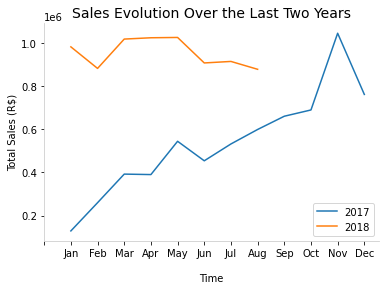

In [43]:
ax = sns.lineplot(data = sales_2017, x='order_purchase_month', y='sales', label = '2017')
ax = sns.lineplot(data = sales_2018.iloc[:-4, :], x='order_purchase_month', y='sales', label = '2018')
format_spines(ax, right_border=False)
ax.set_xlabel('Time', labelpad=15)
ax.set_ylabel('Total Sales (R$)')
ax.set_title('Sales Evolution Over the Last Two Years', size=14)
ax.set_xticks(np.arange(13))
ax.set_xticklabels(['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
                           'Oct', 'Nov', 'Dec'])

In [44]:
sales_2018.iloc[:-4, :]

,order_purchase_year,order_purchase_month,sales
15,2018,1,982295
16,2018,2,882310
17,2018,3,1018392
18,2018,4,1024458
19,2018,5,1025932
20,2018,6,907669
21,2018,7,914670
22,2018,8,878224


In [45]:
sales_2018

,order_purchase_year,order_purchase_month,sales
15,2018,1,982295
16,2018,2,882310
17,2018,3,1018392
18,2018,4,1024458
19,2018,5,1025932
20,2018,6,907669
21,2018,7,914670
22,2018,8,878224
23,2018,9,145
0,2018,10,0


In [46]:
orders_month = orders.copy()
orders_month['order_purchase_year_month'] = pd.to_datetime(orders_month['order_purchase_timestamp'], format='%Y-%m').dt.to_period('M')
orders_month.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,actual_delivery_time,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017-10-12 03:43:48,1,credit_card,1,18.12,6.0,2017,10,Monday,2017-10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017-10-12 03:43:48,3,voucher,1,2.00,6.0,2017,10,Monday,2017-10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017-10-12 03:43:48,2,voucher,1,18.59,6.0,2017,10,Monday,2017-10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,2018-08-08 18:37:50,1,boleto,1,141.46,12.0,2018,7,Tuesday,2018-07
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,2018-08-22 19:07:58,1,credit_card,3,179.12,9.0,2018,8,Wednesday,2018-08


In [47]:
orders_month = orders.copy()


orders_month['order_approved_at'] = pd.to_datetime(orders_month.order_approved_at, format='%Y-%m').dt.to_period('M')
# orders_month['order_delivered_customer_date'] = pd.to_datetime(orders_month.order_delivered_customer_date).dt.date
# orders_month['order_estimated_delivery_date'] = pd.to_datetime(orders_month.order_estimated_delivery_date).dt.date
# orders_month['order_delivered_carrier_date'] = pd.to_datetime(orders_month.order_delivered_carrier_date).dt.date
# orders_month['actual_delivery_time'] = orders_month.order_delivered_customer_date - orders_month.order_delivered_carrier_date
# orders_month['actual_delivery_time'] = orders_month['actual_delivery_time'].dt.days
orders_month.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,actual_delivery_time,order_purchase_year,order_purchase_month,order_purchase_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017-10-11,2017-10-12 03:43:48,1,credit_card,1,18.12,6.0,2017,10,Monday
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017-10-11,2017-10-12 03:43:48,3,voucher,1,2.00,6.0,2017,10,Monday
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017-10-11,2017-10-12 03:43:48,2,voucher,1,18.59,6.0,2017,10,Monday
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,2018-08-08,2018-08-08 18:37:50,1,boleto,1,141.46,12.0,2018,7,Tuesday
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,2018-08-18,2018-08-22 19:07:58,1,credit_card,3,179.12,9.0,2018,8,Wednesday


In [48]:
df_sales = orders.groupby(['order_purchase_year'])

In [49]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,actual_delivery_time,order_purchase_year,order_purchase_month,order_purchase_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017-10-11,2017-10-12 03:43:48,1,credit_card,1,18.12,6.0,2017,10,Monday
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017-10-11,2017-10-12 03:43:48,3,voucher,1,2.00,6.0,2017,10,Monday
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2017-10-11,2017-10-12 03:43:48,2,voucher,1,18.59,6.0,2017,10,Monday
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,2018-08-08,2018-08-08 18:37:50,1,boleto,1,141.46,12.0,2018,7,Tuesday
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,2018-08-18,2018-08-22 19:07:58,1,credit_card,3,179.12,9.0,2018,8,Wednesday


In [50]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   117329 non-null  object        
 3   order_purchase_timestamp       117329 non-null  datetime64[ns]
 4   order_approved_at              117314 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116094 non-null  datetime64[ns]
 6   order_delivered_customer_date  114858 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   order_item_id                  117329 non-null  int64         
 9   product_id                     117329 non-null  object        
 10  seller_id                      117329 non-null  object        
 11  

In [51]:
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [76]:
# orders = orders_df.merge(order_items, on='order_id')

orders2 = orders.merge(product_trans, on='product_id')

In [77]:
orders2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,order_purchase_month,order_purchase_day,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,10,Monday,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,10,Monday,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,10,Monday,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,...,8,Tuesday,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,...,8,Wednesday,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0


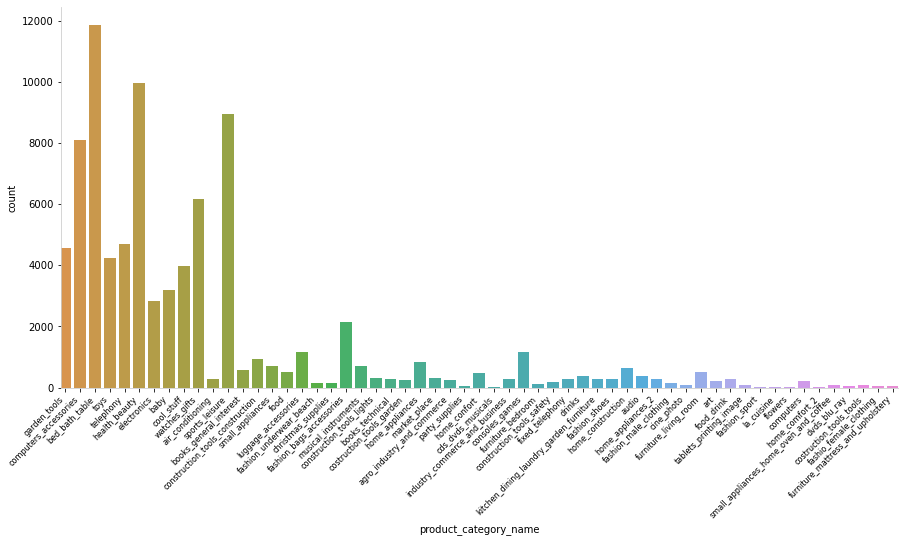

In [89]:
plt.figure(figsize=(15,7))
# ax = sns.lineplot(data = sales, x = 'year_month', y = 'sales')
ax = sns.countplot(data = orders2, x = 'product_category_name')
format_spines(ax, right_border=False)
# ax.tick_params(axis='x', labelrotation=45, labelright=True)

# ax.set_xticks(orders2['product_category_name'].unique())
# ax.set_xticklabels(labels = orders2['product_category_name'], rotation=45)
plt.xticks(ha='right', rotation=45)
plt.tick_params(axis='x', which='major', labelsize=8)
plt.gca().margins(x=-0.1)

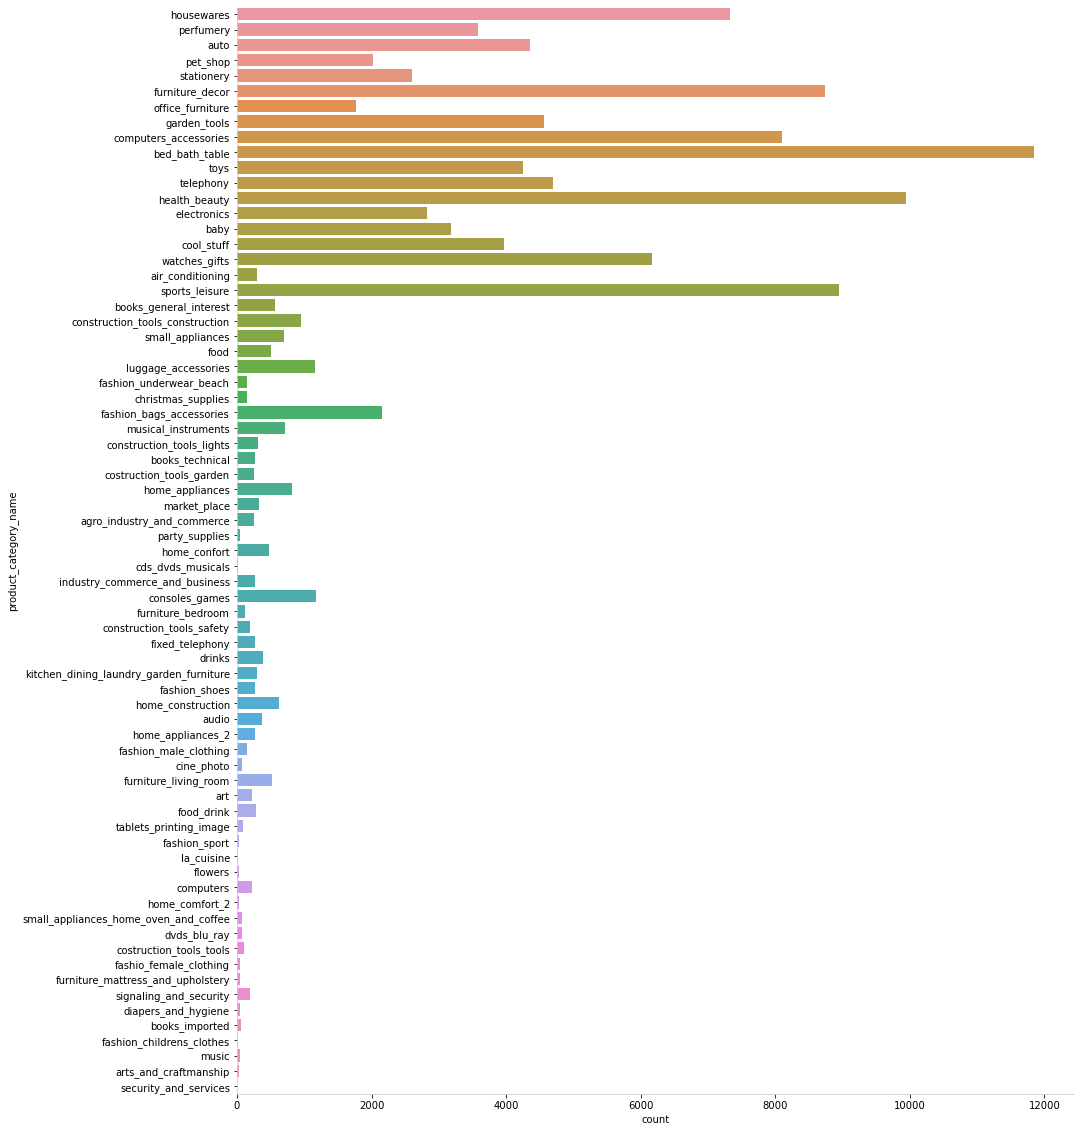

In [93]:
plt.figure(figsize=(15,20))
# ax = sns.lineplot(data = sales, x = 'year_month', y = 'sales')
ax = sns.countplot(data = orders2, y = 'product_category_name')
format_spines(ax, right_border=False)
# ax.tick_params(axis='x', labelrotation=45, labelright=True)

# ax.set_xticks(orders2['product_category_name'].unique())
# ax.set_xticklabels(labels = orders2['product_category_name'], rotation=45)
# plt.xticks(ha='right', rotation=45)
# plt.tick_params(axis='x', which='major', labelsize=8)
# plt.gca().margins(x=-0.1)